# N-Grams, Collocation & PointWise Mutual Information

### Import Libraries - Initial Set-Up

In [1]:
# Natural Language Processing Tonikization
import nltk 
nltk.download('book')
from nltk.book import *
# Data Visualization
import matplotlib.pyplot as plt
# Numerical Manipulation
import numpy as np
# Data Manipulation
import pandas as pd
# Plotly
import plotly.express as px

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### Bi-grams
---

*    Consecutive Pairs of Words Occurance.

In [2]:
# Setting Bi-grams on MobyDick Text
md_bigrams = list(bigrams(text1))
# Distribution Frequency on List
fdist = FreqDist(md_bigrams)
# First 10 counts
md_bigrams[:10]

[('[', 'Moby'),
 ('Moby', 'Dick'),
 ('Dick', 'by'),
 ('by', 'Herman'),
 ('Herman', 'Melville'),
 ('Melville', '1851'),
 ('1851', ']'),
 (']', 'ETYMOLOGY'),
 ('ETYMOLOGY', '.'),
 ('.', '(')]

In [3]:
# Most Common Bi-grams
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

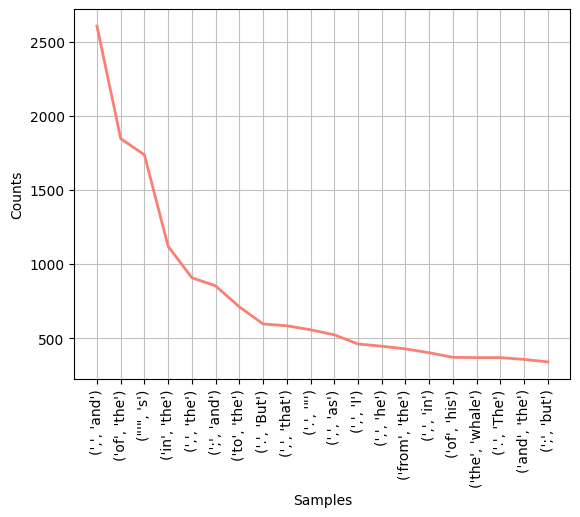

In [4]:
# Bi-gram Visualization
fdist.plot(20, color='salmon')
plt.show()

### Bi-grams Filtering

---

*   Let's note the most common bigrams do not actually represent phrases or lexical structures of interest.


*   Perhaps by applying some type of filter will allow us to see more relevant structures.

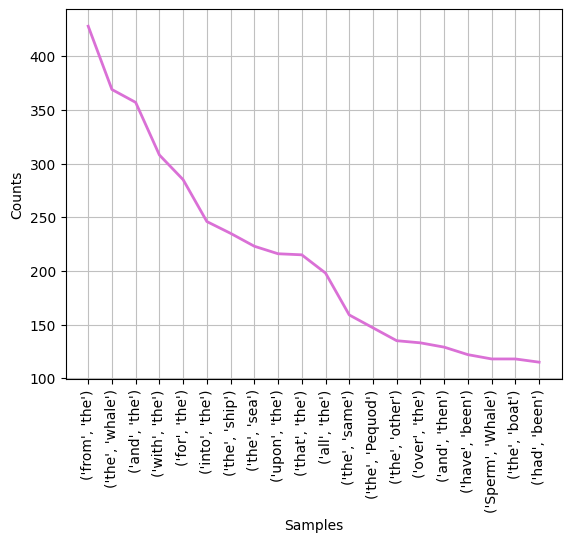

In [5]:
# Threshold
threshold = 2


# Filtered Bi-grams List
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
# Its Filtered Bi-grams Frequency
filtered_dist = FreqDist(filtered_bigrams)
# Visualization
filtered_dist.plot(20, color='orchid')
plt.show()

### Tri-grams

---


In [6]:
# Getting N-grams Method
from nltk.util import ngrams
# Tri-grams List Storage
md_trigrams = list(ngrams(text1,3))
# Filtered Tri-grams Frequency Distribution
fdist = FreqDist(md_trigrams)
md_trigrams[:10]

[('[', 'Moby', 'Dick'),
 ('Moby', 'Dick', 'by'),
 ('Dick', 'by', 'Herman'),
 ('by', 'Herman', 'Melville'),
 ('Herman', 'Melville', '1851'),
 ('Melville', '1851', ']'),
 ('1851', ']', 'ETYMOLOGY'),
 (']', 'ETYMOLOGY', '.'),
 ('ETYMOLOGY', '.', '('),
 ('.', '(', 'Supplied')]

In [7]:
# 10 Most Common Bi-grams
fdist.most_common(10)

[((',', 'and', 'the'), 187),
 (('don', "'", 't'), 103),
 (('of', 'the', 'whale'), 101),
 ((',', 'in', 'the'), 93),
 ((',', 'then', ','), 87),
 (('whale', "'", 's'), 81),
 (('.', 'It', 'was'), 81),
 (('ship', "'", 's'), 80),
 (('the', 'Sperm', 'Whale'), 77),
 ((',', 'as', 'if'), 76)]

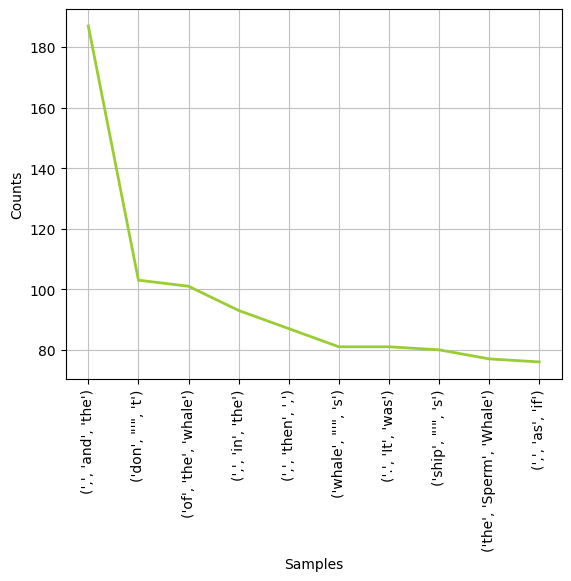

In [8]:
# Tri-gram Visualization
fdist.plot(10, color='yellowgreen')
plt.show()

# Collocations

---

*   They are sequences of words that usually occur in texts or conversations with an **unusually high frequency** [NLTK doc](http://www.nltk.org/book/ch01.html)
*   Las colocaciones de una palabra son declaraciones formales de donde suele ubicarse tipicamente esa palabra [Manning & Schütze, 1990, Foundations of Statistical Natural Language Processing, Capítulo 6](https://nlp.stanford.edu/fsnlp/)


In [9]:
# Collocation List Identifies
md_bigrams = list(bigrams(text1))

# Threshold
threshold = 2

# Bi-grams Distribution
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
# Filtered Distribution
filtered_bigram_dist = FreqDist(filtered_bigrams)

# Words Distribution
filtered_words = [word for word in text1 if len(word)>threshold]
# Word Distribution
filtered_word_dist = FreqDist(filtered_words)

# Data Frame Set-Up
df = pd.DataFrame()
# Dataframe Set-Up
df['bi_gram'] = list(set(filtered_bigrams))
# First Bi-gram word
df['word_0'] = df['bi_gram'].apply(lambda x: x[0])
# Second Bi-gram word
df['word_1'] = df['bi_gram'].apply(lambda x: x[1])
# Bi-gram Frequency
df['bi_gram_freq'] = df['bi_gram'].apply(lambda x: filtered_bigram_dist[x])
# First Word Frequency
df['word_0_freq'] = df['word_0'].apply(lambda x: filtered_word_dist[x])
# Second Word Frequency
df['word_1_freq'] = df['word_1'].apply(lambda x: filtered_word_dist[x])
df

,bi_gram,word_0,word_1,bi_gram_freq,word_0_freq,word_1_freq
0,"(men, never)",men,never,1,236,195
1,"(and, inscriptions)",and,inscriptions,1,6024,3
2,"(rearing, upon)",rearing,upon,1,5,538
3,"(pitch, him)",pitch,him,2,19,1058
4,"(another, lonely)",another,lonely,1,106,12
...,...,...,...,...,...,...
67937,"(these, cries)",these,cries,1,381,16
67938,"(vessels, are)",vessels,are,1,26,586
67939,"(and, gunwale)",and,gunwale,1,6024,21
67940,"(injured, eye)",injured,eye,1,2,88


# PointWise Mutual Information(PMI)

An _information theory_ based metric to find **Collocations**.
---
$$
PMI = \log\left(\frac{P(w_1, w_2)}{P(w_1)P(w_2)}\right)
$$

In [10]:
# Adding a PMI Column 
df['PMI'] = df[['bi_gram_freq', 'word_0_freq', 'word_1_freq']].apply(lambda x:np.log2(x.values[0]/(x.values[1]*x.values[2])), axis = 1)
# Avoiding Viz Distortion by Bi-gram Frequency Logarithm
df['log(bi_gram_freq)'] = df['bi_gram_freq'].apply(lambda x: np.log2(x))
df

,bi_gram,word_0,word_1,bi_gram_freq,word_0_freq,word_1_freq,PMI,log(bi_gram_freq)
0,"(men, never)",men,never,1,236,195,-15.489973,0.0
1,"(and, inscriptions)",and,inscriptions,1,6024,3,-14.141469,0.0
2,"(rearing, upon)",rearing,upon,1,5,538,-11.393390,0.0
3,"(pitch, him)",pitch,him,2,19,1058,-13.295051,1.0
4,"(another, lonely)",another,lonely,1,106,12,-10.312883,0.0
...,...,...,...,...,...,...,...,...
67937,"(these, cries)",these,cries,1,381,16,-12.573647,0.0
67938,"(vessels, are)",vessels,are,1,26,586,-13.895197,0.0
67939,"(and, gunwale)",and,gunwale,1,6024,21,-16.948823,0.0
67940,"(injured, eye)",injured,eye,1,2,88,-7.459432,0.0


In [11]:
# Sorting Out
df.sort_values(by = 'PMI', ascending=False)

,bi_gram,word_0,word_1,bi_gram_freq,word_0_freq,word_1_freq,PMI,log(bi_gram_freq)
21500,"(Childe, Harold)",Childe,Harold,1,1,1,0.000000,0.0
13273,"(terribly, infected)",terribly,infected,1,1,1,0.000000,0.0
5458,"(Aroostook, hemlock)",Aroostook,hemlock,1,1,1,0.000000,0.0
32962,"(Pottowottamie, Sachem)",Pottowottamie,Sachem,1,1,1,0.000000,0.0
57431,"(Nat, Swaine)",Nat,Swaine,1,1,1,0.000000,0.0
...,...,...,...,...,...,...,...,...
3880,"(man, the)",man,the,1,508,13721,-22.732783,0.0
1252,"(some, the)",some,the,1,578,13721,-22.919024,0.0
412,"(one, the)",one,the,1,889,13721,-23.540138,0.0
54156,"(the, not)",the,not,1,13721,1103,-23.851315,0.0


In [12]:
# Plotly Interactive Visualization

# Attributes Visualization
fig = px.scatter(x = df['PMI'].values, y = df['log(bi_gram_freq)'].values, color = df['PMI']+df['log(bi_gram_freq)'], 
                 size = (df['PMI']+df['log(bi_gram_freq)']).apply(lambda x: 1/(1+abs(x))).values,
                 # Cursor Information 
                 hover_name = df['bi_gram'].values, width = 600, height = 600, labels = {'x': 'PMI', 'y': 'Log(Bigram Frequency)'})
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# NLPTK Pre-Build Measures

In [14]:
# Check Documentation https://www.nltk.org/_modules/nltk/metrics/association.html

# NLTK Collocation Libraries
from nltk.collocations import *
# Getting  Bigrams s & PMI Metrics
bigram_measures = nltk.collocations.BigramAssocMeasures()
# Finder Aid for Collocations
finder = BigramCollocationFinder.from_words(text1)

In [15]:
# Frequency & Threshold Filter on 20
finder.apply_freq_filter(20)
# Getting Best Candidate Collocations
finder.nbest(bigram_measures.pmi, 10)

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other')]

# Spanish Text (Textos en Español)

---
*   Since spanish is data scientist mother tongue  who is running this model. 
*   It has been decided to give some room and carry out this model, but now, focused on the Spanish language.

In [17]:
# Dowloading Spanish Corpus Procedure  https://mailman.uib.no/public/corpora/2007-October/005448.html

# Getting Spanish Dataset
nltk.download('cess_esp')
# Spanish News Corpus
corpus = nltk.corpus.cess_esp.sents() 
# Flatten Procedure
flatten_corpus = [w for l in corpus for w in l]

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


In [18]:
# Getting first Element
print(corpus[0])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.']


In [19]:
# Getting First 50 Elements
print(flatten_corpus[:50])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.', 'Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto']


In [20]:
# Getting  & Setting FinderBigrams from Documents and set the corpus 
finder = BigramCollocationFinder.from_documents(corpus)
# Collocations Frequency Filter 
finder.apply_freq_filter(10)
# Obtaining Relevancy
finder.nbest(bigram_measures.pmi, 10)

[('señora', 'Aguirre'),
 ('secretario', 'general'),
 ('elecciones', 'generales'),
 ('campaña', 'electoral'),
 ('quiere', 'decir'),
 ('Se', 'trata'),
 ('segunda', 'vuelta'),
 ('director', 'general'),
 ('primer', 'ministro'),
 ('primer', 'lugar')]